### List Libraries to Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pandas_profiling import ProfileReport
import pickle

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

### Load the Dataset

In [4]:
df = pd.read_csv('Admission_Prediction.csv')

### Generate Profile Report to Understand Data

In [5]:
pf = ProfileReport(df)

pf.to_widgets()  # To create widget screen within Jupyter Notebook

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Handle missing values and duplicates

See Jupyter Notebook:  01. EDA Important Codes.ipynb

## Linear Regression (One Feature)

In [7]:
df = pd.read_csv('Advertising.csv')

x = df[["TV"]]
y = df['Sales']

In [8]:
from sklearn.linear_model import LinearRegression

In [12]:
linear = LinearRegression()
linear.fit(x,y)

LinearRegression()

In [19]:
# To check coeffecients (slope)

linear.coef_

array([0.05546477])

In [20]:
# To check intercept

linear.intercept_

6.974821488229891

### Save the Model

Only saves the model information. For example, y = 0.5x + 3. Does not save the input dataset.

In [21]:
file = 'linear_reg.sav'                 
pickle.dump(linear,open(file,'wb'))

### Predict / Estimate

Use the model to predict/estimate label based on input value of the feature

In [22]:
linear.predict([[45]])

C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.47073616])

In [23]:
l = [4,5,6,7,89,34,45,67,23]

In [24]:
for i in l :
    print(linear.predict([[i]]))

[7.19668057]
[7.25214534]
[7.30761011]
[7.36307488]
[11.91118606]
[8.86062368]
[9.47073616]
[10.69096111]
[8.25051121]


C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ashar\anaconda3\anaconda\lib\site-pa

### How to Use Saved Model Directly for Predictions

In [25]:
file = 'linear_reg.sav'
pickle.dump(linear,open(file,'wb'))

In [26]:
saved_model = pickle.load(open(file,'rb'))

In [27]:
saved_model.predict([[45]])

C:\Users\ashar\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.47073616])

### Model Score

In [28]:
linear.score(x,y)

0.8121757029987414

## Multiple variable regression or polynomial regression

In [29]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [30]:
x = df[['TV', 'Radio', 'Newspaper']]

In [31]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [32]:
y = df.Sales
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [33]:
linear = LinearRegression() #create an object of linear regression
linear.fit(x,y)

LinearRegression()

In [34]:
print(linear.intercept_)
print(linear.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


#### The equation is:      Sales = 0.0544 TV + 0.107 Radio + 0.00033 Newspaper + 4.625
This equation is the model

#### How to find the confidence of this model? Answer: r^2

What is confidence? Out of 100 datapoints, how many times will the output of the equation is same as actual value

In [35]:
linear.score(x,y)

0.9025912899684558

In [36]:
new_x = df[['TV', 'Radio']]
y = df.Sales

In [37]:
lm1 = LinearRegression()
lm1.fit(new_x, y)
lm1.score(new_x,y)

0.9025896186081139

### Two Ways to Code Regression

There are two ways to code regression models:
    
    1. using Scikit learn (sklearn) library. Already discussed
    2. Using statistical model approach.
    
    Let's learn about 2nd type

In [40]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV+Radio+Newspaper', data = df).fit()    #ols: ordinary least square 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           8.13e-99
Time:                        10:34:11   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**See the values of p > |t|**    

For news paper, it is 0.954.     

Subtract this number from 1. That is 1-0.954 = 0.046 or 4.6%     

This means Newspaper significance level is only 4.6% (Very low). News paper is contributing only 4.6%     

In simple words, This means, out of 100 experiments, there are only 4.6 experiments is contributing to sales. This is too low.    
So, newspaper feature can be dropped while feature selection (a check where we see what features are contributing and what features are not contributing).

**Significance cutoff value:**

As a general rule of thumb, if a feature has significance of over 95% we will keep it (during feature selection) or else, we will drop the feature. Some times, significance cut off can be 90% too.

**See the values of std err. This is called standard error or standard deviation.**

TV + Radio + Newspaper: 0.901

**How adjusted R - square is different than R - square, in which scenario, we consider R - square**

If r-square is increasing, it is usually not because the model accuracy is increasing. It is due to over-fitting. So, r-square is not a reliable metric to determine the accuracy of the model.

This is where adjusted r-square comes into picture. Adjusted r - square is a reliable measure of accuracy of the model.


r square  = 1 - RSS/TSS  = 1 - residual summations square / total summation square


Adjusted r square =  1 -  ((1-R2)(N-1)/(N-P-1))   

where,  P is number of features or number of feature columns, N is number of total rows or total samples








**Multicollinearity**

Multicollinearity is a statistical concept where several independent variables in a model are correlated

Example: Demand (or supply) and cost  are usually multicollinear (or correlated)

How to find multicollinearity between variables:

Most common approach is: Pearson's r plot (or Pearson's Correlation Plot).


Always remember, when we talk about multicollinearity, we talk about how various features are correlated and NOT feature and label (output).


**Variance Inflation Factor (VIF)** 

VIF = 1 / (1-R2)

If VIF > 10 (or R2 > 0.9), then we can consider that the dataset is highly correlated or collinear.



#### Regularization  Techniques

1. Least Absolute Shrinkage and Selection Operator (LASSO). This is also called L1 regularization

If coeffecients are small, for example 0.1 then L2 (Ridge) will remain unaffected while L1(Lasso) is affected.
If coeffecients are big, for example 2 then L2 (Ridge) will have very high effect while L1(Lasso) will have moderate effect

For generalized equation, that takes care of all values of coeffecients (small or big), we use "Elastic Net"

Cost Function for Elastic Net Regression: See below (hand written notes)    

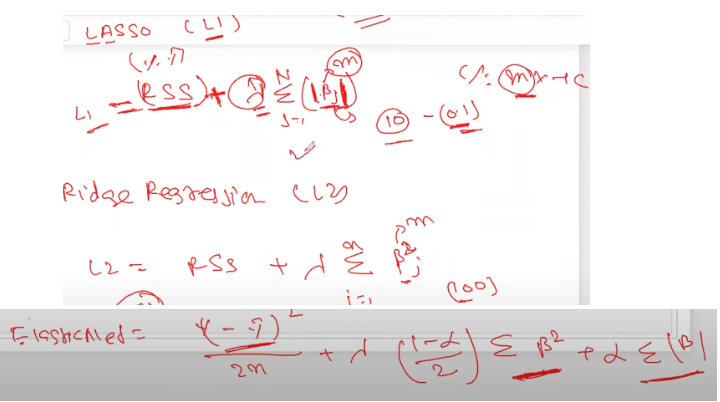